# Basic Data Cleaning in Python 


Based on mauna loa (Hawaii) CO2 measurment data between 1959 and 1997.

In [171]:
# Read csv using pandas, and get proper column names

import pandas as pd
maunaloa_filename = 'mauna-loa-atmospheric-co2.csv'
maunaloa = pd.read_csv(maunaloa_filename, sep=',', decimal='.', header=None,
names = ['CO2_in_ppm', 'date'])
maunaloa.head(5)


,CO2_in_ppm,date
0,315.42,1959.000000
1,316.31,1959.083333
2,316.50,1959.166667
3,317.56,1959.250000
4,318.13,1959.333333


In [172]:
maunaloa.shape

(468, 2)

In [173]:
# There is need to prepare appropriate datetime format for pandas

from datetime import timedelta, datetime
import calendar
import numpy as np

def convert_partial_year(number):
    year = int(number)
    if calendar.isleap(year):
        d = timedelta(days=(number - year)*365)
    else:
        d = timedelta(days=(number - year)*366)
    day_one = datetime(year,1,1)
    date = d + day_one
    return date

maunaloa['date']=maunaloa['date'].apply(convert_partial_year)


In [174]:
maunaloa.head(5)

,CO2_in_ppm,date
0,315.42,1959-01-01 00:00:00.000000
1,316.31,1959-01-31 11:59:59.894591
2,316.50,1959-03-03 00:00:00.105409
3,317.56,1959-04-02 12:00:00.000000
4,318.13,1959-05-02 23:59:59.894591


In [175]:
maunaloa.dtypes

CO2_in_ppm           float64
date          datetime64[ns]
dtype: object

## Sample data plot in seaborn

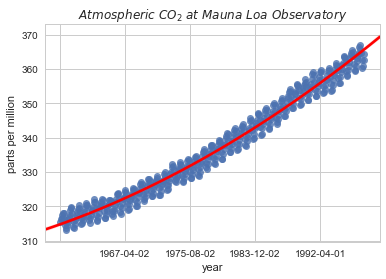

In [182]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# Applying seaborn style to mpl
sns.set()
%matplotlib inline
plt.rc('font', family='Arial')

sns.set_style('whitegrid')
sns.despine(fig=None)

plt.title(r'$Atmospheric\ CO_2\ at\ Mauna\ Loa\ Observatory$')

# Seaborn doesnt support datetimes in regplot, but here's and ugly hack
maunaloa = maunaloa.sort_values('date')
maunaloa['date_f'] = pd.factorize(maunaloa['date'])[0] + 1
mapping = dict(zip(maunaloa['date_f'], maunaloa['date'].dt.date))


ax = sns.regplot('date_f', 'CO2_in_ppm', data=maunaloa,order =2, line_kws = {'color':"red"})
labels = pd.Series(ax.get_xticks(0)).map(mapping).fillna('')
ax.set_xticklabels(labels)
ax.set_xlabel('year')
ax.set_ylabel('parts per million')